In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [ ]:
# Build the Sequential feedforward neural network model
model = Sequential([Flatten(input_shape = (28,28))])
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Build the Sequential convolutional neural network model
model1 = Sequential([
                    Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
                    MaxPooling2D((3,3)),
                    Flatten(),
                   Dense(10, activation = 'softmax')
])

In [ ]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate = 0.05)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model1.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = [acc, mae])

In [ ]:
# Print the resulting model attributes
print(model1.loss)
print(model1.optimizer)
print(model1.metrics)
print(model1.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.05>


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

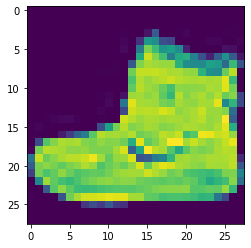

labels    Ankle boot


In [ ]:
# Display one of the images
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f'labels    {labels[train_labels[i]]}')

In [ ]:
# Fit the model

history = model1.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size = 256)

Epoch 1/8
235/235 [==============================] - 12s 52ms/step - loss: 0.6231 - sparse_categorical_accuracy: 0.7873 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 12s 52ms/step - loss: 0.4237 - sparse_categorical_accuracy: 0.8484 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3980 - sparse_categorical_accuracy: 0.8577 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3808 - sparse_categorical_accuracy: 0.8634 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8644 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.8659 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 12s 52ms/step - loss: 0.3690 - sparse_categoric

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.623095,0.787317,4.420001
1,0.423672,0.848417,4.420000
2,0.398003,0.857683,4.420001
3,0.380762,0.863433,4.420002
4,0.375443,0.864433,4.420001


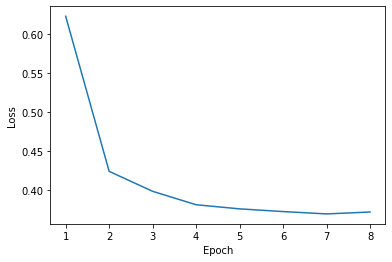

In [ ]:
# Make a plot for the loss
epoch = list(df.index)
epoch = [x + 1 for x in epoch]
losses = df['loss']
plt.plot(epoch, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
loss, accuracy, mae = model1.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.8519 - mean_absolute_error: 4.4200


In [ ]:
print(loss)

0.41680479049682617


In [ ]:
print(accuracy)

0.8518999814987183


In [ ]:
print(mae)

4.419997215270996


In [ ]:
predictions = model.predict(test_images[..., np.newaxis])

In [ ]:
predictions

array([[0.14374185, 0.12589002, 0.09289156, ..., 0.0781091 , 0.09028693,
        0.10762343],
       [0.09248438, 0.15443635, 0.1317403 , ..., 0.09597773, 0.1132112 ,
        0.05817628],
       [0.0979479 , 0.11844207, 0.13164781, ..., 0.09732216, 0.09831304,
        0.0785038 ],
       ...,
       [0.10315356, 0.11020477, 0.11386206, ..., 0.0901778 , 0.09431253,
        0.10379735],
       [0.12332806, 0.11196683, 0.10083359, ..., 0.08903243, 0.10167285,
        0.09676281],
       [0.11000119, 0.10979243, 0.0981362 , ..., 0.09112443, 0.10106424,
        0.10727465]], dtype=float32)